In [1]:
import numpy as np
import torch

In [2]:
from models import MPS, ComplexTensor

In [3]:
L=4
local_dim=2
bond_dim=10

In [88]:
psi = MPS(L=L, local_dim=local_dim, bond_dim=bond_dim)

In [89]:
fname="samples_ghz_plus_z_basis_only_L=4_Nmeasure=100000.npy"
samples = np.load(fname)
samples_tr = torch.tensor((samples + 1)/2).to(torch.long)


In [90]:
from torch.utils.data import TensorDataset, DataLoader

In [91]:
ds = TensorDataset(samples_tr)

In [92]:
batch_size = 1024
lr = .1

In [93]:
dl = DataLoader(ds, batch_size=batch_size, shuffle=True)

In [94]:
losses = []

In [95]:
for s in dl:
    s=s[0]
    for i in range(L-1):

        psi.gauge_to(i)
        A = psi.merge(i).numpy()
        g=psi.grad_twosite_logprob(i, s).numpy()
        A = A - lr * g
        psi.set_sites_from_twosite(i, A,cutoff=1e-10,normalize='left')
      
    for i in range(L-2, -1,-1):

        psi.gauge_to(i)
        A = psi.merge(i).numpy()
        g=psi.grad_twosite_logprob(i, s).numpy()
        A = A - lr * g
        psi.set_sites_from_twosite(i, A,cutoff=1e-10,normalize='right')
    with torch.no_grad():
        losses.append(psi.nll_loss(s))



In [96]:
len(losses)

98

In [97]:
import matplotlib.pyplot as plt

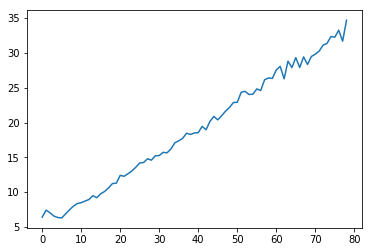

In [98]:
%matplotlib inline
plt.plot(losses)

In [100]:
psi.prob_normalized(s[0])

tensor([nan], grad_fn=<DivBackward0>)

In [102]:
psi.tensors[0].real

Parameter containing:
tensor([[[-8.7012e+23, -7.9166e+20]],

        [[ 1.2436e+22, -5.5393e+22]]], requires_grad=True)